# Buenos Aires Cultural Thread


## Introduction / Business Problem

Buenos Aires is the cultural hub of Latin America. Nevertheless, it is such a big city that opportunities to understand what is the cultural thread of the city and how it varies from neighborhood to neighborhood are very scarce. As such, I propose to solve this by trying to understand the distinctive "Arts & Entertainment" Venue Category from Foursquare to create a cultural map, clustering neighborhoods based on their similarities. Hopefully, neighborhoods with a distintive cultural thread will emerge so that we can understan the different polos present in the city. After, opportunities may rise for new cultural investors to revamp different neighborhoods or invest in changing others.

## Data

I'll import data from the City of Buenos Aires to map all neighbordoods and their latitude/longitude. To narrow my search, I'll only use foursquare's "Arts & Entertainment" venue category.

## Methodology

Use the city of Buenos Aires database to import all information from neighborhoods. 

Barrios = neighborhoods

In [13]:
import pandas as pd

df = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.csv')
df.head()


,WKT,barrio,comuna,perimetro,area
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15,7724.852955,3.115707e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15,8131.857075,3.615978e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5,8537.901368,4.050752e+06


Well.. this data needs some clean-up! I'll drop the comuna, perimetro and area values to make it more clean. To arrange the WKT column may take some extra efforts

In [14]:
df.drop('area', axis=1, inplace=True)
df.drop('perimetro', axis=1, inplace=True)
df.drop('comuna', axis=1, inplace=True)
df.head()

,WKT,barrio
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO


Good, now I need to extract the "Polygon" part to then clean up the Latitude / Longitude

In [15]:
df[["Polygon","Lat"]]= df["WKT"].str.split(" ", n = 1, expand = True) 
df.drop('WKT', axis=1, inplace=True)
df.head()

,barrio,Polygon,Lat
0,CHACARITA,POLYGON,"((-58.4528200492791 -34.5959886570639,-58.4536..."
1,PATERNAL,POLYGON,"((-58.4655768128541 -34.5965577078058,-58.4656..."
2,VILLA CRESPO,POLYGON,"((-58.4237529813037 -34.5978273383243,-58.4249..."
3,VILLA DEL PARQUE,POLYGON,"((-58.4946097568899 -34.6148652395239,-58.4947..."
4,ALMAGRO,POLYGON,"((-58.4128700313089 -34.6141162515854,-58.4128..."


Seems that the Latitude/Longitude column has loads of data! I'm going to clean it so that I have two columns with clear points

In [16]:
df[["Latitud","Longitud"]]= df["Lat"].str.split(" ", n = 1, expand = True) 
df.head()

,barrio,Polygon,Lat,Latitud,Longitud
0,CHACARITA,POLYGON,"((-58.4528200492791 -34.5959886570639,-58.4536...",((-58.4528200492791,"-34.5959886570639,-58.453655193137 -34.5965557..."
1,PATERNAL,POLYGON,"((-58.4655768128541 -34.5965577078058,-58.4656...",((-58.4655768128541,"-34.5965577078058,-58.4656201094845 -34.596704..."
2,VILLA CRESPO,POLYGON,"((-58.4237529813037 -34.5978273383243,-58.4249...",((-58.4237529813037,"-34.5978273383243,-58.4249540814512 -34.597851..."
3,VILLA DEL PARQUE,POLYGON,"((-58.4946097568899 -34.6148652395239,-58.4947...",((-58.4946097568899,"-34.6148652395239,-58.4947856335725 -34.615016..."
4,ALMAGRO,POLYGON,"((-58.4128700313089 -34.6141162515854,-58.4128...",((-58.4128700313089,"-34.6141162515854,-58.4128163384983 -34.615443..."


In [17]:
df[["Latitud","Longitud2"]]= df["Longitud"].str.split(",", n = 1, expand = True) 
df.head()

,barrio,Polygon,Lat,Latitud,Longitud,Longitud2
0,CHACARITA,POLYGON,"((-58.4528200492791 -34.5959886570639,-58.4536...",-34.5959886570639,"-34.5959886570639,-58.453655193137 -34.5965557...","-58.453655193137 -34.5965557163041,-58.4537674..."
1,PATERNAL,POLYGON,"((-58.4655768128541 -34.5965577078058,-58.4656...",-34.5965577078058,"-34.5965577078058,-58.4656201094845 -34.596704...","-58.4656201094845 -34.5967043067336,-58.465540..."
2,VILLA CRESPO,POLYGON,"((-58.4237529813037 -34.5978273383243,-58.4249...",-34.5978273383243,"-34.5978273383243,-58.4249540814512 -34.597851...","-58.4249540814512 -34.5978518131509,-58.426302..."
3,VILLA DEL PARQUE,POLYGON,"((-58.4946097568899 -34.6148652395239,-58.4947...",-34.6148652395239,"-34.6148652395239,-58.4947856335725 -34.615016...","-58.4947856335725 -34.6150160431958,-58.495572..."
4,ALMAGRO,POLYGON,"((-58.4128700313089 -34.6141162515854,-58.4128...",-34.6141162515854,"-34.6141162515854,-58.4128163384983 -34.615443...","-58.4128163384983 -34.6154434604642,-58.412754..."


In [20]:
df.rename(columns = {'Longitud2':'Longitud'}, inplace = True) 
df.head()


,barrio,Latitud,Longitud
0,CHACARITA,-34.5959886570639,"-58.453655193137 -34.5965557163041,-58.4537674..."
1,PATERNAL,-34.5965577078058,"-58.4656201094845 -34.5967043067336,-58.465540..."
2,VILLA CRESPO,-34.5978273383243,"-58.4249540814512 -34.5978518131509,-58.426302..."
3,VILLA DEL PARQUE,-34.6148652395239,"-58.4947856335725 -34.6150160431958,-58.495572..."
4,ALMAGRO,-34.6141162515854,"-58.4128163384983 -34.6154434604642,-58.412754..."


In [21]:
df[["Longitud 1","Longitud2"]]= df["Longitud"].str.split(" ", n = 1, expand = True) 
df.head()

,barrio,Latitud,Longitud,Longitud 1,Longitud2
0,CHACARITA,-34.5959886570639,"-58.453655193137 -34.5965557163041,-58.4537674...",-58.453655193137,"-34.5965557163041,-58.4537674321647 -34.596634..."
1,PATERNAL,-34.5965577078058,"-58.4656201094845 -34.5967043067336,-58.465540...",-58.4656201094845,"-34.5967043067336,-58.4655402165487 -34.596646..."
2,VILLA CRESPO,-34.5978273383243,"-58.4249540814512 -34.5978518131509,-58.426302...",-58.4249540814512,"-34.5978518131509,-58.4263027567354 -34.597882..."
3,VILLA DEL PARQUE,-34.6148652395239,"-58.4947856335725 -34.6150160431958,-58.495572...",-58.4947856335725,"-34.6150160431958,-58.4955729951466 -34.614391..."
4,ALMAGRO,-34.6141162515854,"-58.4128163384983 -34.6154434604642,-58.412754...",-58.4128163384983,"-34.6154434604642,-58.4127540403586 -34.616629..."


In [22]:
df.drop('Longitud', axis=1, inplace=True)
df.drop('Longitud2', axis=1, inplace=True)
df.head()

,barrio,Latitud,Longitud 1
0,CHACARITA,-34.5959886570639,-58.453655193137
1,PATERNAL,-34.5965577078058,-58.4656201094845
2,VILLA CRESPO,-34.5978273383243,-58.4249540814512
3,VILLA DEL PARQUE,-34.6148652395239,-58.4947856335725
4,ALMAGRO,-34.6141162515854,-58.4128163384983


In [23]:
df.rename(columns = {'Longitud 1':'Longitude', 'Latitud':'Latitude'}, inplace = True) 
df.head()

,barrio,Latitude,Longitude
0,CHACARITA,-34.5959886570639,-58.453655193137
1,PATERNAL,-34.5965577078058,-58.4656201094845
2,VILLA CRESPO,-34.5978273383243,-58.4249540814512
3,VILLA DEL PARQUE,-34.6148652395239,-58.4947856335725
4,ALMAGRO,-34.6141162515854,-58.4128163384983


Well... That wasn't easy, but now we are ready to start playing around with our data set. (It's not easy trying to innovate from NYC, San Francisco or Toronto!)

I'll import the necessary libraries

In [24]:
import json # library to handle JSON files
!pip install geopy

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 112kB 3.2MB/s eta 0:00:01
Libraries imported.


Let's make sure that the geolocator app identifies Buenos Aires properly

In [25]:
address = 'Buenos Aires'

geolocator = Nominatim(user_agent="caba_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Buenos Aires are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Buenos Aires are -34.6075682, -58.4370894.


Perfect! Now let's get the datatypes as float to ensure a smooth map creation

In [28]:
df.Latitude = df.Latitude.astype("float")
df.Longitude = df.Longitude.astype("float")


Now we are ready to create our Buenos Aires map, let's take a look!

In [29]:
# create map of Torongo using latitude and longitude values
map_caba = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['barrio']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_caba)  
    
map_caba


That is my hometown, Buenos Aires! Everything seems to be on point to bring in the Foursquare data

In [43]:
CLIENT_ID = 'F424ZBR44ORF0S0OOPXAA51DW22SEKVSGFYGI1JUTGFEYOWR' # your Foursquare ID
CLIENT_SECRET = 'NT53BOBPMFADJBJQETWFRNMHRRHXMMZ5DRNADCMDM0AZNSPH' # your Foursquare Secret
ACCESS_TOKEN = '2YNIHYTO1AOXLXEAZIKDNEABZJBRRMSKEKJFT0F4NIU1RBQP' # your FourSquare Access Token
VERSION = '20180604' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F424ZBR44ORF0S0OOPXAA51DW22SEKVSGFYGI1JUTGFEYOWR
CLIENT_SECRET:NT53BOBPMFADJBJQETWFRNMHRRHXMMZ5DRNADCMDM0AZNSPH


Now, instead of calling to the general Foursquare venue, I'll use the unique Category ID for Arts&Entertainment. This way, results will be narrowed to this venue category

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7104d754a06370d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
caba_venues = getNearbyVenues(names=df['barrio'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

CHACARITA
PATERNAL
VILLA CRESPO
VILLA DEL PARQUE
ALMAGRO
CABALLITO
VILLA SANTA RITA
MONTE CASTRO
VILLA REAL
FLORES
FLORESTA
CONSTITUCION
SAN CRISTOBAL
BOEDO
VELEZ SARSFIELD
VILLA LURO
PARQUE PATRICIOS
MATADEROS
VILLA LUGANO
SAN TELMO
SAAVEDRA
COGHLAN
VILLA URQUIZA
COLEGIALES
BALVANERA
VILLA GRAL. MITRE
PARQUE CHAS
AGRONOMIA
VILLA ORTUZAR
BARRACAS
PARQUE AVELLANEDA
PARQUE CHACABUCO
NUEVA POMPEYA
PALERMO
VILLA RIACHUELO
VILLA SOLDATI
VILLA PUEYRREDON
VILLA DEVOTO
LINIERS
VERSALLES
PUERTO MADERO
MONSERRAT
SAN NICOLAS
BELGRANO
RECOLETA
RETIRO
NUÑEZ
BOCA


In [111]:
caba_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CHACARITA,-34.595989,-58.453655,Margen del Mundo,-34.596987,-58.456835,Museum
1,CHACARITA,-34.595989,-58.453655,Tangostreets,-34.598492,-58.454293,Tour Provider
2,CHACARITA,-34.595989,-58.453655,Salon Caldas,-34.593738,-58.455636,Music Venue
3,PATERNAL,-34.596558,-58.465620,El Unicornio Espacio de Arte y Creatividad,-34.599898,-58.466745,Arts & Entertainment
4,PATERNAL,-34.596558,-58.465620,Todo Música Deposito,-34.596325,-58.467731,Music Venue
...,...,...,...,...,...,...,...
169,NUÑEZ,-34.537210,-58.458872,Espacio Cultural Nuestros Hijos (ECuNHi),-34.537005,-58.463722,Performing Arts Venue
170,BOCA,-34.629774,-58.354267,Usina del Arte,-34.628741,-58.356955,Art Gallery
171,BOCA,-34.629774,-58.354267,El Galpon de la Boca,-34.632172,-58.354733,Performing Arts Venue
172,BOCA,-34.629774,-58.354267,Museo del Cine Pablo Ducrós Hicken,-34.629282,-58.356824,Art Museum


Time to organize this data!

In [47]:
# one hot encoding
caba_onehot = pd.get_dummies(caba_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
caba_onehot['Neighbourhood'] = caba_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [caba_onehot.columns[-1]] + list(caba_onehot.columns[:-1])
caba_onehot = caba_onehot[fixed_columns]

caba_onehot.head()

,Neighbourhood,Art Gallery,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site,Movie Theater,...,Museum,Music Venue,Performing Arts Venue,Piano Bar,Rock Club,Roller Rink,Salsa Club,Street Art,Theater,Tour Provider
0,CHACARITA,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,CHACARITA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,CHACARITA,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,PATERNAL,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PATERNAL,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
caba_grouped = caba_onehot.groupby('Neighbourhood').mean().reset_index()
caba_grouped

,Neighbourhood,Art Gallery,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site,Movie Theater,...,Museum,Music Venue,Performing Arts Venue,Piano Bar,Rock Club,Roller Rink,Salsa Club,Street Art,Theater,Tour Provider
0,AGRONOMIA,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,ALMAGRO,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000
2,BALVANERA,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,...,0.153846,0.000000,0.153846,0.000000,0.000000,0.00,0.000000,0.000000,0.538462,0.000000
3,BARRACAS,0.200000,0.00,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.200000,0.00,0.000000,0.000000,0.200000,0.000000
4,BOCA,0.250000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000
5,BOEDO,0.000000,0.00,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,CABALLITO,0.000000,0.00,0.000000,0.250000,0.250000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,CHACARITA,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.333333,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.333333
8,COGHLAN,0.111111,0.00,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.111111,...,0.111111,0.222222,0.000000,0.222222,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,COLEGIALES,0.000000,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


In [49]:
#Neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in caba_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = caba_grouped[caba_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
num_top_venues = 5

for hood in caba_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = caba_grouped[caba_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AGRONOMIA----
                   venue  freq
0  Performing Arts Venue   1.0
1            Art Gallery   0.0
2             Art Museum   0.0
3                Theater   0.0
4             Street Art   0.0


----ALMAGRO----
           venue  freq
0  Indie Theater  0.50
1        Theater  0.25
2   Dance Studio  0.25
3    Art Gallery  0.00
4    Music Venue  0.00


----BALVANERA----
                   venue  freq
0                Theater  0.54
1                 Museum  0.15
2  Performing Arts Venue  0.15
3          Indie Theater  0.08
4              Multiplex  0.08


----BARRACAS----
                   venue  freq
0            Art Gallery   0.2
1                Theater   0.2
2         History Museum   0.2
3              Rock Club   0.2
4  Performing Arts Venue   0.2


----BOCA----
                   venue  freq
0            Art Gallery  0.25
1             Art Museum  0.25
2                Theater  0.25
3  Performing Arts Venue  0.25
4             Street Art  0.00


----BOEDO----
            

In [180]:
#Pandas Dataframe on above code
import numpy as np

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = caba_grouped['Neighbourhood']

for ind in np.arange(caba_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(caba_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AGRONOMIA,Performing Arts Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site
1,ALMAGRO,Indie Theater,Theater,Dance Studio,Tour Provider,Art Museum,Arts & Entertainment,Concert Hall,History Museum,Memorial Site,Movie Theater
2,BALVANERA,Theater,Performing Arts Venue,Museum,Multiplex,Indie Theater,Memorial Site,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio
3,BARRACAS,Art Gallery,Rock Club,Performing Arts Venue,History Museum,Theater,Memorial Site,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio
4,BOCA,Art Gallery,Art Museum,Performing Arts Venue,Theater,Movie Theater,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater


Now it's time to figure out what is the best number of K to organize the clusters, testing both the inertia and the distortion methods

In [181]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
caba_grouped_clustering = caba_grouped.drop('Neighbourhood', 1)
caba_grouped_clustering.dropna(inplace= True)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(caba_grouped_clustering)
    kmeanModel.fit(caba_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(caba_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / caba_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(caba_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / caba_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [173]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.5837701316053855
2 : 0.48526891854815646
3 : 0.4356658244403359
4 : 0.4121485027871991
5 : 0.3911326297995254
6 : 0.36810739997948644
7 : 0.3472268892873217
8 : 0.3186142047260118
9 : 0.29470010981756356


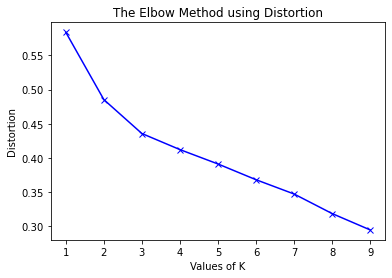

In [174]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [176]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 16.510984568455754
2 : 12.813110591977939
3 : 10.771546990097812
4 : 9.690227578948885
5 : 8.733817599214426
6 : 7.835772350449003
7 : 6.792211436252716
8 : 5.910756332173456
9 : 5.024775425869748


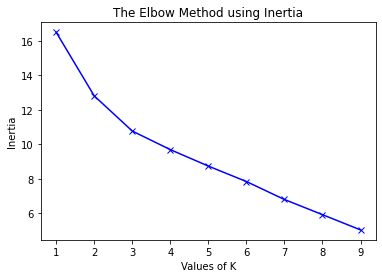

In [177]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

For both methods, 3 seems to be the best value of K

In [182]:
# set number of clusters
kclusters = 3

caba_grouped_clustering = caba_grouped.drop('Neighbourhood', 1)
caba_grouped_clustering.dropna(inplace= True)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(caba_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [183]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dfc = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
dfc = dfc.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='barrio')

dfc.head() # check the last columns!

,barrio,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHACARITA,-34.595989,-58.453655,1.0,Tour Provider,Music Venue,Museum,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater
1,PATERNAL,-34.596558,-58.465620,1.0,Art Gallery,Performing Arts Venue,Music Venue,Arts & Entertainment,Movie Theater,Art Museum,Concert Hall,Dance Studio,History Museum,Indie Theater
2,VILLA CRESPO,-34.597827,-58.424954,1.0,Music Venue,Art Gallery,Salsa Club,Indie Theater,Concert Hall,Dance Studio,Performing Arts Venue,Theater,Memorial Site,Art Museum
3,VILLA DEL PARQUE,-34.614865,-58.494786,1.0,Art Gallery,Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site,Movie Theater
4,ALMAGRO,-34.614116,-58.412816,1.0,Indie Theater,Theater,Dance Studio,Tour Provider,Art Museum,Arts & Entertainment,Concert Hall,History Museum,Memorial Site,Movie Theater


Now we should check if we have any NaN values or Inf to clean the data set. This way I'll be able to form the map correctly

In [97]:
dfc.isnull().values.any()

True

Time to clean the data.

In [184]:
dfc.replace([np.inf, -np.inf], np.nan, inplace=True) 
dfc.dropna(inplace= True)
dfc['Cluster Labels'] = dfc['Cluster Labels'].astype(int)
dfc.head()

,barrio,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHACARITA,-34.595989,-58.453655,1,Tour Provider,Music Venue,Museum,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater
1,PATERNAL,-34.596558,-58.465620,1,Art Gallery,Performing Arts Venue,Music Venue,Arts & Entertainment,Movie Theater,Art Museum,Concert Hall,Dance Studio,History Museum,Indie Theater
2,VILLA CRESPO,-34.597827,-58.424954,1,Music Venue,Art Gallery,Salsa Club,Indie Theater,Concert Hall,Dance Studio,Performing Arts Venue,Theater,Memorial Site,Art Museum
3,VILLA DEL PARQUE,-34.614865,-58.494786,1,Art Gallery,Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site,Movie Theater
4,ALMAGRO,-34.614116,-58.412816,1,Indie Theater,Theater,Dance Studio,Tour Provider,Art Museum,Arts & Entertainment,Concert Hall,History Museum,Memorial Site,Movie Theater


In [185]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dfc['Latitude'], dfc['Longitude'], dfc['barrio'], dfc['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now, we'll analyze each cluster to understand what is inside

### Cluster 1

In [186]:
dfc.loc[dfc['Cluster Labels'] == 0, dfc.columns[[0] + list(range(4, dfc.shape[1]))]]

,barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,FLORES,Performing Arts Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site
12,SAN CRISTOBAL,Performing Arts Venue,Music Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater
16,PARQUE PATRICIOS,Performing Arts Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site
27,AGRONOMIA,Performing Arts Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site
32,NUEVA POMPEYA,Performing Arts Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site
35,VILLA SOLDATI,Performing Arts Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site


Wow. This is uncanny, this neighborhoods have virtually the same results!

Going into the data one could see that many of this actually don't have a lot of cultural offering, and this is somewhat a default setting. If that would be the case it could be that these neighborhoods just don't have a lot of data on Foursquare.

### Cluster 2

In [187]:
dfc.loc[dfc['Cluster Labels'] == 1, dfc.columns[[0] + list(range(4, dfc.shape[1]))]]

,barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHACARITA,Tour Provider,Music Venue,Museum,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater
1,PATERNAL,Art Gallery,Performing Arts Venue,Music Venue,Arts & Entertainment,Movie Theater,Art Museum,Concert Hall,Dance Studio,History Museum,Indie Theater
2,VILLA CRESPO,Music Venue,Art Gallery,Salsa Club,Indie Theater,Concert Hall,Dance Studio,Performing Arts Venue,Theater,Memorial Site,Art Museum
3,VILLA DEL PARQUE,Art Gallery,Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site,Movie Theater
4,ALMAGRO,Indie Theater,Theater,Dance Studio,Tour Provider,Art Museum,Arts & Entertainment,Concert Hall,History Museum,Memorial Site,Movie Theater
5,CABALLITO,Indie Theater,Concert Hall,Dance Studio,Tour Provider,Theater,Art Museum,Arts & Entertainment,History Museum,Memorial Site,Movie Theater
6,VILLA SANTA RITA,Performing Arts Venue,Street Art,Dance Studio,Music Venue,Theater,Tour Provider,Memorial Site,Art Museum,Arts & Entertainment,Concert Hall
7,MONTE CASTRO,Rock Club,Dance Studio,Performing Arts Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,History Museum,Indie Theater
8,VILLA REAL,Dance Studio,Tour Provider,Theater,Art Museum,Arts & Entertainment,Concert Hall,History Museum,Indie Theater,Memorial Site,Movie Theater
10,FLORESTA,Performing Arts Venue,Street Art,Dance Studio,Music Venue,Theater,Tour Provider,Memorial Site,Art Museum,Arts & Entertainment,Concert Hall


This cluster shows the variety of attractions present in Buenos Aires. Probably it is the most representative of what life in Buenos Aires is. 

The city clearly shows a strong inclination towards music and art related venues. It is interesting to see the decline of cinemas in such drastic way. 

Personally, I think that Versalles is incredible! WHY IS ROLLER RINK #1!!! THIS IS OUTSTANDING. 



### Cluster 3

In [188]:
dfc.loc[dfc['Cluster Labels'] == 2, dfc.columns[[0] + list(range(4, dfc.shape[1]))]]

,barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,VILLA URQUIZA,Music Venue,Concert Hall,Rock Club,Performing Arts Venue,Tour Provider,Memorial Site,Art Museum,Arts & Entertainment,Dance Studio,History Museum
26,PARQUE CHAS,Music Venue,Arts & Entertainment,Tour Provider,Movie Theater,Art Museum,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site
33,PALERMO,Music Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site
45,RETIRO,Music Venue,Tour Provider,Movie Theater,Art Museum,Arts & Entertainment,Concert Hall,Dance Studio,History Museum,Indie Theater,Memorial Site


These neighborhoods show a clear preference for music cenues. Although Palermo and Retiro are geographically very distant, they display exactly the same trends. As two of the most developed 'barrios' in Buenos Aires it is very interesting to see the overlap.

On the other hand, Villa Urquiza and Parque Chas are very close to each other, yet display somewhat different status. It's very interesting to see the overlap between Parque Chas and Palermo/Retiro even though they are very distant one from the other.



## Results

One thing is clear, there are three types on cultural neighborhoods in Buenos Aires. Cluster #2 is what Buenos Aires is known for -> Diversity.

But the results for clusters 1 and 3 are amazing and baffle me to some extent. How can different neighborhoods present so similar insights! For Cluster 1, these neighborhoods may only have a one performing arts center and that's it, or they could lack further foursquare adoption. Regardless, this places need further investment in art & entertaiment facilities!

Cluster 3 may have a similar faith. The pin for Retiro and Palermo may not be very accurate. On the other hand, Villa Urquiza is well known as the music hub of the city, and Parque Chas is slowly growing to be one. Should you be an investor in the music industry, Parque Chas could be the up & coming neighborhood you should target. 

Cluster 2 shows the typical Buenos Aires picture... it's very eclectic! 

One of the shortcomings of the FourSquare data is that it is so granular that it may take a toll on the level of insight. Music Venue and Rock Club are not that different, and as such you may loose on the actual cultural thread in Buenos Aires